In [1]:
import docx
import re
import xlsxwriter
import cv2
import fnmatch
import numpy as np
import pytesseract
from wand.image import Image as wi
import matplotlib.pyplot as plt
import os
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\caio.santos\AppData\Local\Tesseract-OCR\tesseract.exe"

In [2]:
def show_requestnumber(imagem):
    try:
        img = cv2.imread(imagem)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        lower_range = np.array([0, 200, 200])
        upper_range = np.array([0, 255, 255])

        mask = cv2.inRange(hsv, lower_range, upper_range)

        _, bin = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)
        cont, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        cv2.drawContours(img, cont, -1, (0, 255, 0), 3)
        for c in cont:
            (x, y, w, z) = cv2.boundingRect(c)
            roi = img[y:y + z, x:x + w]

        return img

    except TypeError:
        print("Não tem request nessa folha")


def get_requestnumbers_fromimg(imagem, isfile=True):
    try:
        if isfile == True:
            img = cv2.imread(imagem)
        else:
            img = imagem

        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        lower_range = np.array([0, 200, 200])
        upper_range = np.array([0, 255, 255])

        mask = cv2.inRange(hsv, lower_range, upper_range)

        _, bin = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)
        cont, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        text = []

        for c in cont:
            (x, y, w, z) = cv2.boundingRect(c)
            roi = img[y:y + z, x:x + w]
            text.append(pytesseract.image_to_string(roi))

        return text
    except TypeError:
        print("Não tem request nessa folha")

def pdftojpgconvert(inputPath, filename, outputPath):
    os.chdir(inputPath)

    pdf = wi(filename=filename, resolution=300)
    pages = pdf.convert('jpeg')

    if outputPath == '':
        os.chdir(inputPath)
    else:
        os.chdir(outputPath)
    n = 0
    for img in pages.sequence:
        n += 1
        im = wi(img)
        im.save(filename='ima' + str(n) + '.jpg')
    # wand to save the images		Segundos total         em minutos	    em segundos por folha
    # 4 folhas: 4 segundos	                  4,50 	             0,08 	                     1,13
    # 20 folhas: 28 segundos	             28,00 	             0,47 	                     1,40
    # 79 folhas: 156.67 segundos            156,67 	             2,61 	                     1,98


def get_requesttoexcel(filepath, excelpath='', excelname='new workbook', pat=True):
    rex1 = re.compile('R\$?S?\s?\d+?\,?\d?\d?\d?\.?\d?\d?\sm?b?illion')
    rex2 = re.compile('R\$?S?\s?\d+?\,?\d?\d?\d?\.?\d?\d?\n')
    rex3 = re.compile('\d+?\.?\d?\d?\%')

    pdf = wi(filename=filepath, resolution=300)
    pdfimg = pdf.convert('jpeg')
    pages = []
    imgblobs = []

    for img in pdfimg.sequence:
        page=wi(image=img)
        imgblobs.append(page.make_blob('jpeg'))

    for im in imgblobs:
        npimg = np.asarray(bytearray(im), dtype=np.uint8)
        p = cv2.imdecode(npimg, cv2.IMREAD_UNCHANGED)
        pages.append(p)

    excel = xlsxwriter.Workbook(f'{excelpath}\\{excelname}.xlsx')
    sh = excel.add_worksheet('new sheet')

    r = 0
    for p in pages:
        c = 0
        r += 1
        page = pytesseract.image_to_string(p[3050:3500, 1000:1500])
        sh.write(r, c, f'n° Pagina OM: {page}')

        t = get_requestnumbers_fromimg(p, isfile=False)

        if pat == False:
            for p in t:
                c += 1
                sh.write(r, c, p)
        else:
            for p2 in t:
                if rex1.search(p2):
                    for num in rex1.findall(p2):
                        c += 1
                        sh.write(r, c, num)

                if rex2.search(p2):
                    for num in rex2.findall(p2):
                        c += 1
                        sh.write(r, c, num)

                if rex3.search(p2):
                    for num in rex3.findall(p2):
                        c += 1
                        sh.write(r, c, num)

    excel.close()

In [3]:
pdf = r"C:\Users\caio.santos\Desktop\Xurume\6 - k\6k.pdf"
expath = r"C:\Users\caio.santos\Documents\OFFERING\CEMIG\no confort"


In [4]:
get_requesttoexcel(pdf)

FileCreateError: [Errno 13] Permission denied: '\\new workbook.xlsx'

In [97]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

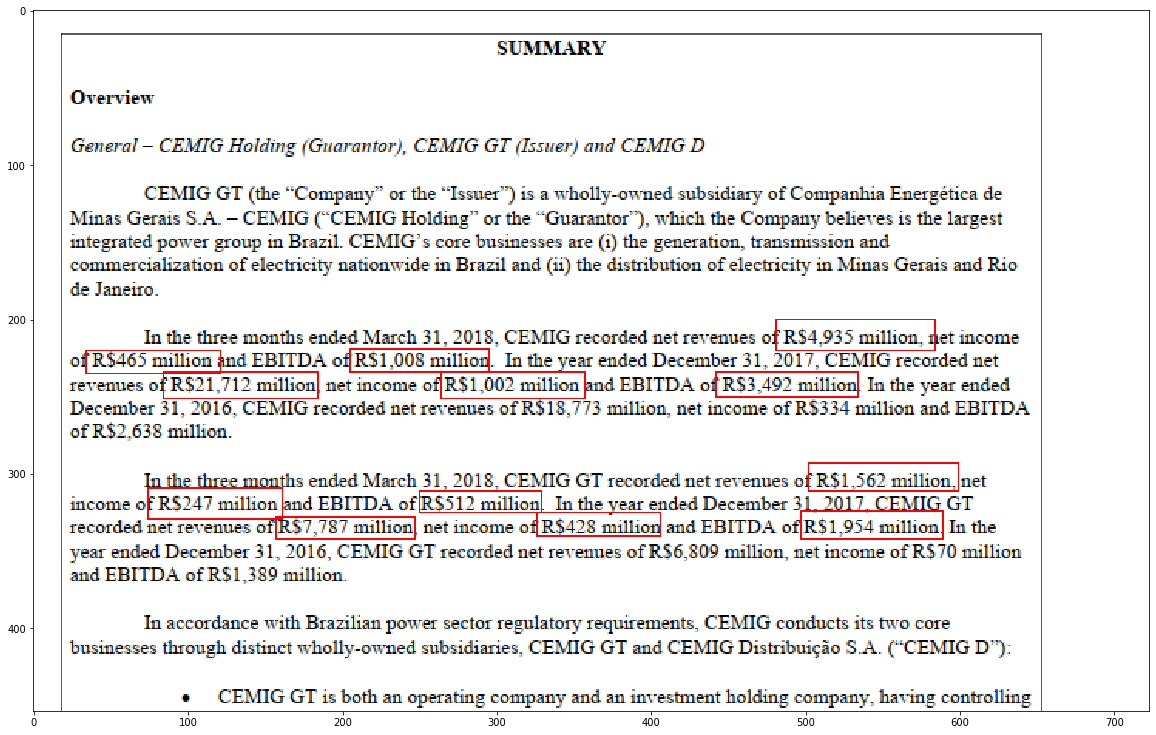

In [98]:
plt.figure(figsize=(20,20))
plt.imshow(img)

In [99]:
img = cv2.imread(imgpath)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_range = np.array([0, 200, 200])
upper_range = np.array([0, 255, 255])

mask = cv2.inRange(hsv, lower_range, upper_range)

In [100]:
#mask
#plt.figure(figsize=(20,20))
#plt.imshow(mask)

In [101]:
cont, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [102]:
#cv2.drawContours(img, cont, -1, (0, 255, 0), 3)

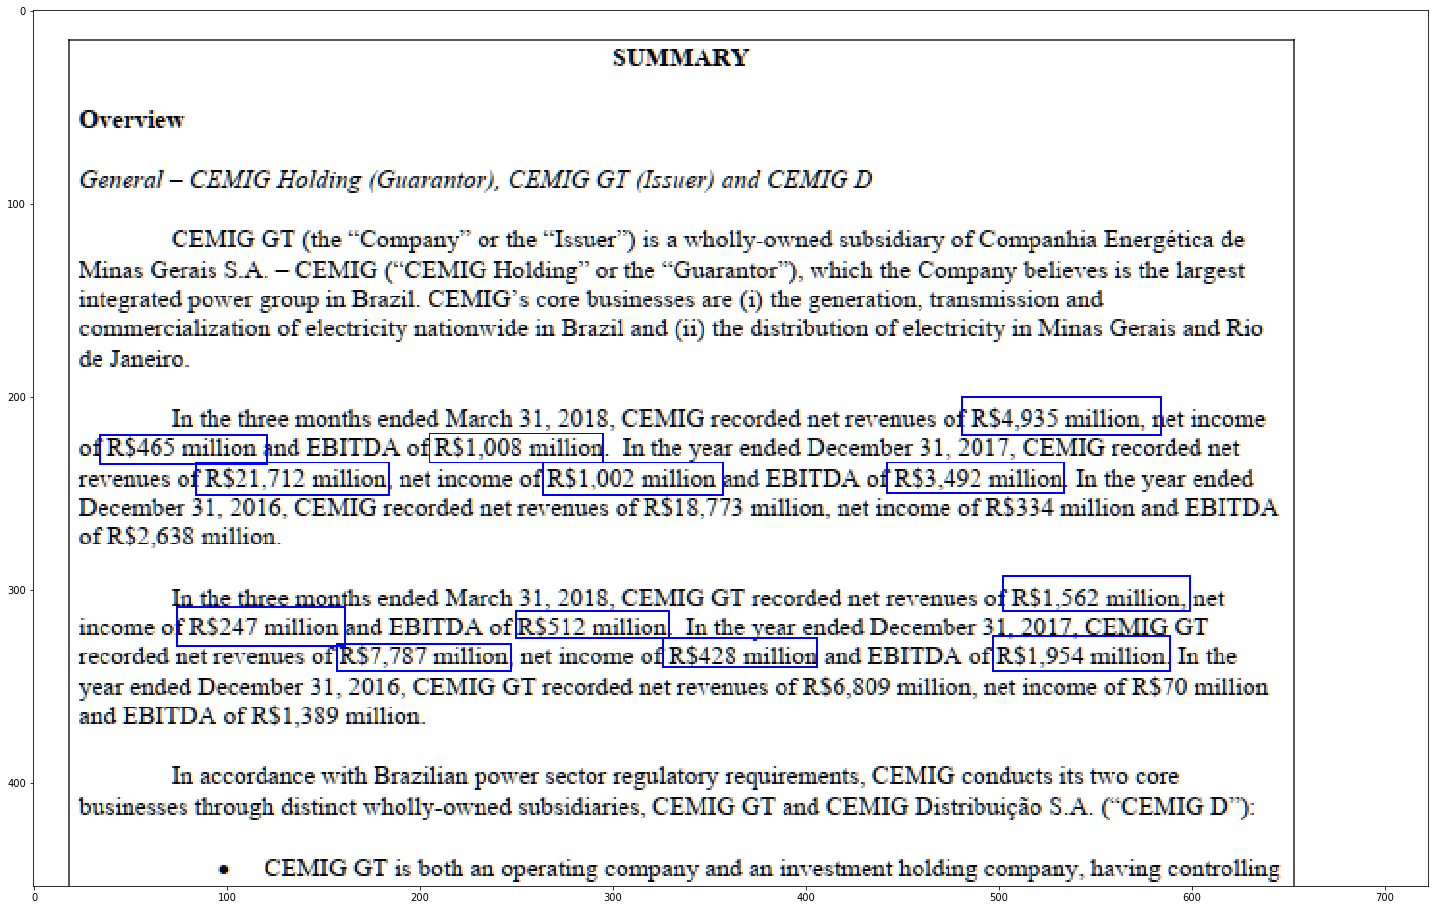

In [103]:
plt.figure(figsize=(25,25))
plt.imshow(img)

In [106]:
(x, y, w, z) = cv2.boundingRect(cont[0])
roi = img[y:y + z, x:x + w]

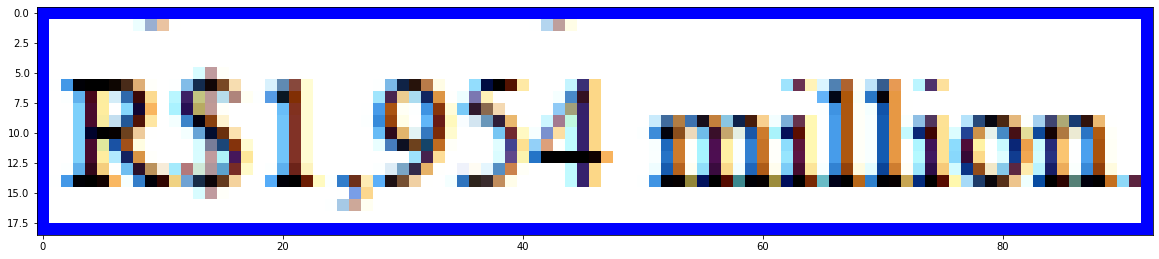

In [107]:
plt.figure(figsize=(20,20))
plt.imshow(roi)


In [78]:
#n=0
#print(f'os números da pãgina {pytesseract.image_to_string(pg)} são:\n')
#for im in get_requestnumbers_fromimg(imagempath):
#    n+=1
    
#    print(f'Numero rect {n}: {im}')
#    print('\n\n')
    

In [83]:
get_requesttoexcel(pdf4,expath, excelname='iraaaaaaa', pat=True)

In [108]:
img2 = img.copy()
template = roi
w, h, chanel = template.shape

In [109]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

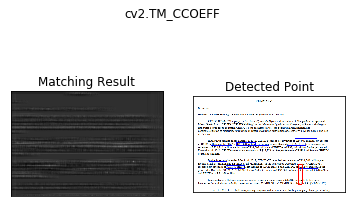

<Figure size 1440x1440 with 0 Axes>

TypeError: 'NoneType' object is not subscriptable

In [110]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.figure(figsize=(20,20))
    plt.show()[0]